# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
print(env.brain_names)

['ReacherBrain']


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
print(brain)
print(type(brain))

Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
<class 'unityagents.brain.BrainParameters'>


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The shape of the state matrix = {}x{}'.format(*states.shape))

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
The shape of the state matrix = 20x33


In [7]:
def print_brain_stats(brain) :
    print("Brain name: ", brain.brain_name)
    print("Camera resolutions: ", brain.camera_resolutions)
    print("#Stacked vector observations: ", brain.num_stacked_vector_observations)
    print("#Visual observations: ", brain.number_visual_observations)
    print("Vector action descriptions: ", brain.vector_action_descriptions)
    print("Vector action space size: ", brain.vector_action_space_size)
    print("Vector action space type: ", brain.vector_action_space_type)
    print("Vector observation space size: ", brain.vector_observation_space_size)
    print("Vector observation space type: ", brain.vector_observation_space_type)
    
# test 
print_brain_stats(brain);

Brain name:  ReacherBrain
Camera resolutions:  []
#Stacked vector observations:  1
#Visual observations:  0
Vector action descriptions:  ['', '', '', '']
Vector action space size:  4
Vector action space type:  continuous
Vector observation space size:  33
Vector observation space type:  continuous


### 3. Train the Agents

In [8]:
# define agent
from ddpg_agent import Agent

state_size = brain.vector_observation_space_size;
action_size = brain.vector_action_space_size;
agent = Agent(state_size=state_size, action_size=action_size, random_seed=72);

1 2 3 4 5 6 7 8 9 10 
Episode 10	Average Score: 2.56
11 12 13 14 15 16 17 18 19 20 
Episode 20	Average Score: 9.05
21 22 23 24 25 26 27 28 29 30 
Episode 30	Average Score: 17.77
31 32 33 34 35 36 37 38 39 40 
Episode 40	Average Score: 22.28
41 42 43 44 45 46 47 48 49 50 
Episode 50	Average Score: 25.00
51 52 53 54 55 56 57 58 59 60 
Episode 60	Average Score: 26.90
61 62 63 64 65 66 67 68 69 70 
Episode 70	Average Score: 28.26
71 72 73 74 75 76 77 78 79 80 
Episode 80	Average Score: 29.26
81 82 83 84 85 86 87 88 89 90 
Episode 90	Average Score: 30.06
91 92 93 94 95 96 97 98 99 100 
Episode 100	Average Score: 30.68
101 102 103 104 105 106 107 108 109 110 
Episode 110	Average Score: 34.09
111 112 113 114 115 116 117 118 119 120 
Episode 120	Average Score: 36.15
121 122 123 124 125 126 127 128 129 130 
Episode 130	Average Score: 36.28
131 132 133 134 135 136 137 138 139 140 
Episode 140	Average Score: 36.35
141 142 143 144 145 146 147 148 149 150 
Episode 150	Average Score: 36.41
151 152 1

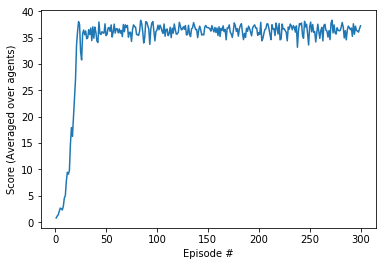

In [9]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=3000, max_t=1000, print_every=10, avg_episode=100):
    scores_deque = deque(maxlen=avg_episode)
    scores_mean = []
    count_satisfaction = 0;
    for i_episode in range(1, n_episodes+1):
        scores = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations 
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards 
            if np.any(dones):                                  # exit loop if episode finished
                break
        print(i_episode, end=" ")
        scores_deque.append(np.mean(scores))
        scores_mean.append(np.mean(scores))
        if i_episode % avg_episode == 0 : # because not necessary to save models always
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_local.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_local.pth')
            torch.save(agent.actor_target.state_dict(), 'checkpoint_actor_target.pth')
            torch.save(agent.critic_target.state_dict(), 'checkpoint_critic_target.pth')        
            # check if the score satisfies the threshold and the agents are trained long enough
            if (np.mean(scores_deque)>=30) :
                count_satisfaction += 1;
                if count_satisfaction == 3 :
                    print("Termination of training -- requirements satisfied.")
                    break;
            
        if i_episode % print_every == 0:
            print("");
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

            
    return scores_mean;

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score (Averaged over agents)')
plt.xlabel('Episode #')
plt.show()

### 4. Test the Agents

In [10]:
import torch
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_local.pth'));
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_local.pth'));

In [12]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
agent.reset()
while True:
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    states = next_states
    scores += rewards 
    if np.any(dones):                                  # exit loop if episode finished
        break        
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 33.771999245136975


#### When finished, you can close the environment.

In [13]:
env.close()